# Titanic

### The Challenge
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.### (_)______


### Metric
Your score is the percentage of passengers you correctly predict (___accuracy___).

<div style="background-color:#3871b2;color:#FFF;font-size:18px;padding:20px;width:60%;border-radius:20px">
    here's my second try to this challenge <a href="https://github.com/ageron/handson-ml3/blob/main/03_classification.ipynb">will observe book solution</a> also will try to follow "Appendx B: Machine Learning Project Checklist"
</div>

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext jupyterlab_notify
%load_ext autoreload
%autoreload 2

The jupyterlab_notify extension is already loaded. To reload it, use:
  %reload_ext jupyterlab_notify
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [134]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# 💾 Fetch Data

In [135]:
from pathlib import Path
import urllib.request
import zipfile
import os
from kaggle.api.kaggle_api_extended import KaggleApi
from kaggle.api_client import ApiClient

In [136]:
def fetch_titanic_dataset():
    titanic_path = "datasets/titanic"
    dataset_path = Path(titanic_path)
    # download dataset
    if not dataset_path.exists():
        api = KaggleApi(ApiClient())
        api.authenticate()
        
        Path("datasets").mkdir(parents=True, exist_ok=True)
        api.competition_download_files("titanic", path="datasets")

        with zipfile.ZipFile(f"{titanic_path}.zip", "r") as zip_file:
            zip_file.extractall(titanic_path)
        
    return pd.read_csv(f"{titanic_path}/train.csv"), pd.read_csv(f"{titanic_path}/test.csv")

In [137]:
train_data, test_data = fetch_titanic_dataset()


- survival Survival	0 = No, 1 = Yes 

- pclass	Ticket class	1 = 1st "Uppr", 2 = 2nd "Mid", 3 = 3rd "Lower"

-  sex	Sex

- Age	Age in year

- ssibsp	# of siblings , spouses aboard the Titanic	

- parch	# of parents , children aboard the Titanic	

- ticket	Ticket number

- fare	Passengerfare

- cabin	Cabin number

- 	embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southamptonhampton

In [138]:
train_data = train_data.set_index("PassengerId")
test_data = test_data.set_index("PassengerId")

In [139]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Explore Data

In [140]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [141]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


- **Suvived** is binary targe
- **Categorical Columns:** Sex, Pclass, Embarked
- **Numerical Columns:** Age, SibSp, Parch, Fare
- **Text Columns:** Name, Ticket, Cabin
- can make "Age", "Fare" categorical
- there's missing values in "Age" around 19% of rows
- there's missing values in "Cabin" around 77% of rows
- there's missing values in "Embarked" around 0.22% of rows
- in _test data_ there's "Age", "Cabin", ___"Fare"___ is missing

In [142]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [143]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


- 🫣 only $\approx$ 40 is survived will use it as baseline accurace

In [144]:
train_data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [145]:
train_data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [146]:
train_data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [147]:
train_data["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [148]:
num_columns = ["Age", "SibSp", "Parch", "Fare"]
cat_columns = ["Sex", "Pclass", "Embarked"]

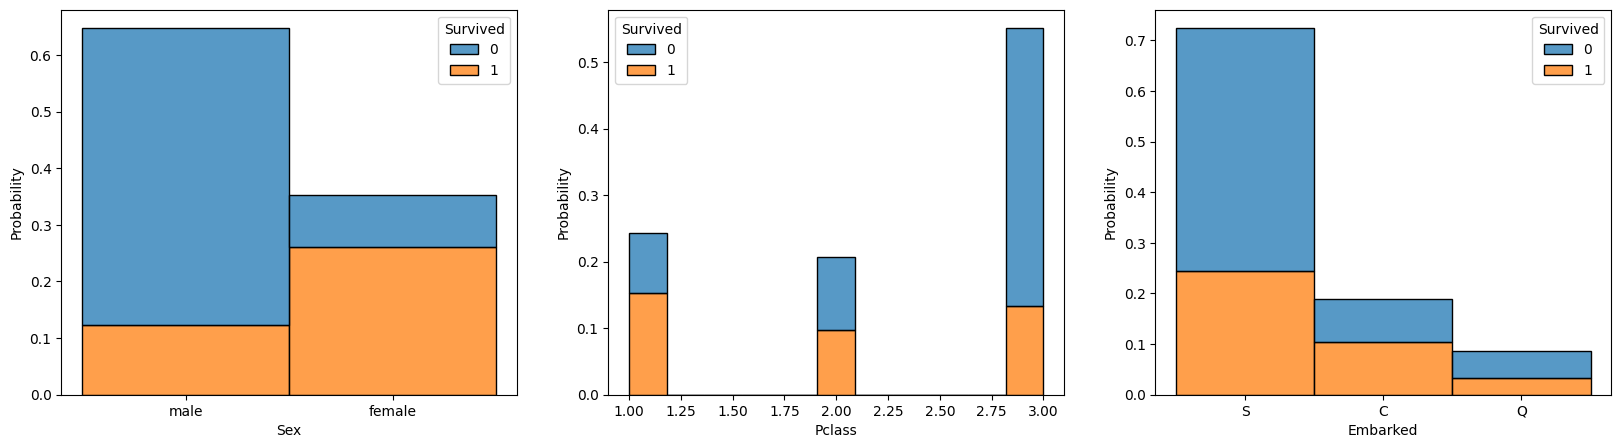

In [149]:
plt.figure(figsize=(20, 5))
for i, class_ in enumerate(cat_columns):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data=train_data, x=class_, hue="Survived", multiple="stack", stat="probability")

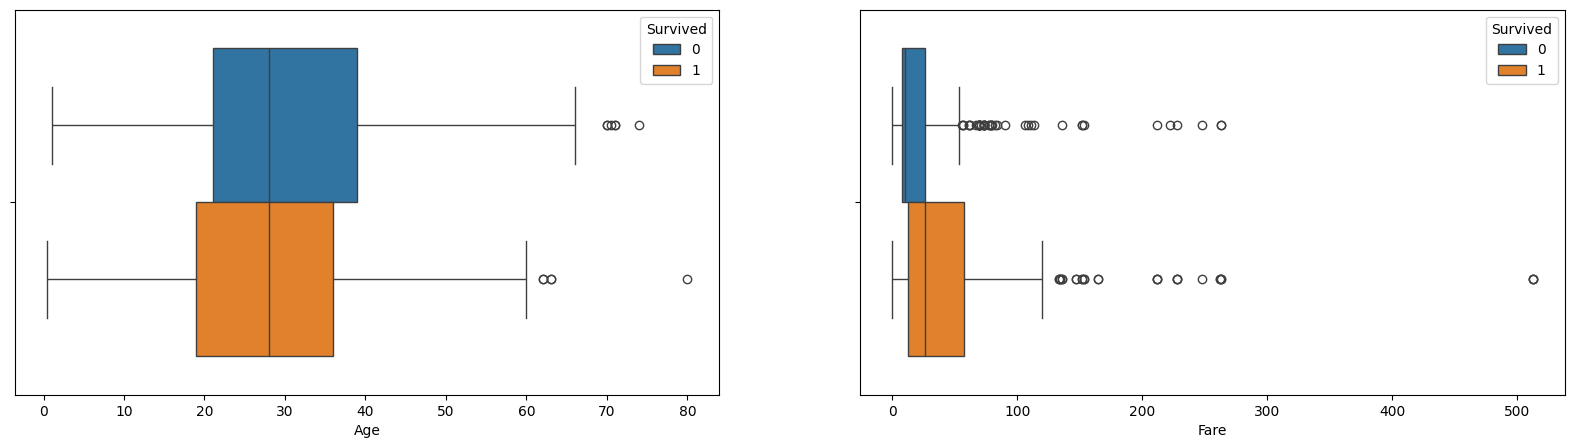

In [150]:
plt.figure(figsize=(20, 5))
for i, class_ in enumerate(["Age", "Fare"]):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(data=train_data, x=class_, hue="Survived")

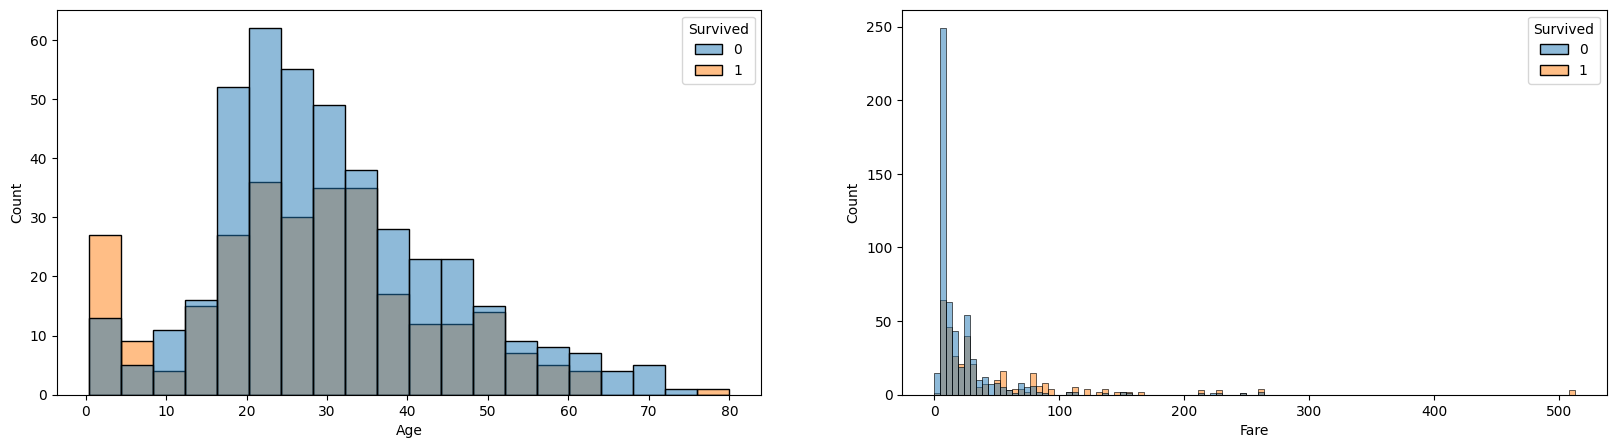

In [151]:
plt.figure(figsize=(20, 5))
for i, class_ in enumerate(["Age", "Fare"]):
    plt.subplot(1, 2, i + 1)
    sns.histplot(data=train_data, x=class_, hue="Survived")

- "Fare" of survived people tend to be larger than unsuvived
- Old people have more chance to unsurvive

In [152]:
# lets try to categorize  "Age"
age_bins = [0, 15, 30, 45, 60, 75]
train_data["AgeBucket"] = pd.qcut(train_data["Age"], 10, )

In [153]:
train_data[["AgeBucket", "Survived"]].groupby(["AgeBucket"]).mean()

C:\Users\asusr\AppData\Local\Temp\ipykernel_9700\394405235.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_data[["AgeBucket", "Survived"]].groupby(["AgeBucket"]).mean()


,Survived
AgeBucket,
"(0.419, 14.0]",0.584416
"(14.0, 19.0]",0.390805
"(19.0, 22.0]",0.283582
"(22.0, 25.0]",0.371429
"(25.0, 28.0]",0.393443
"(28.0, 31.8]",0.393939
"(31.8, 36.0]",0.483516
"(36.0, 41.0]",0.358491
"(41.0, 50.0]",0.397436


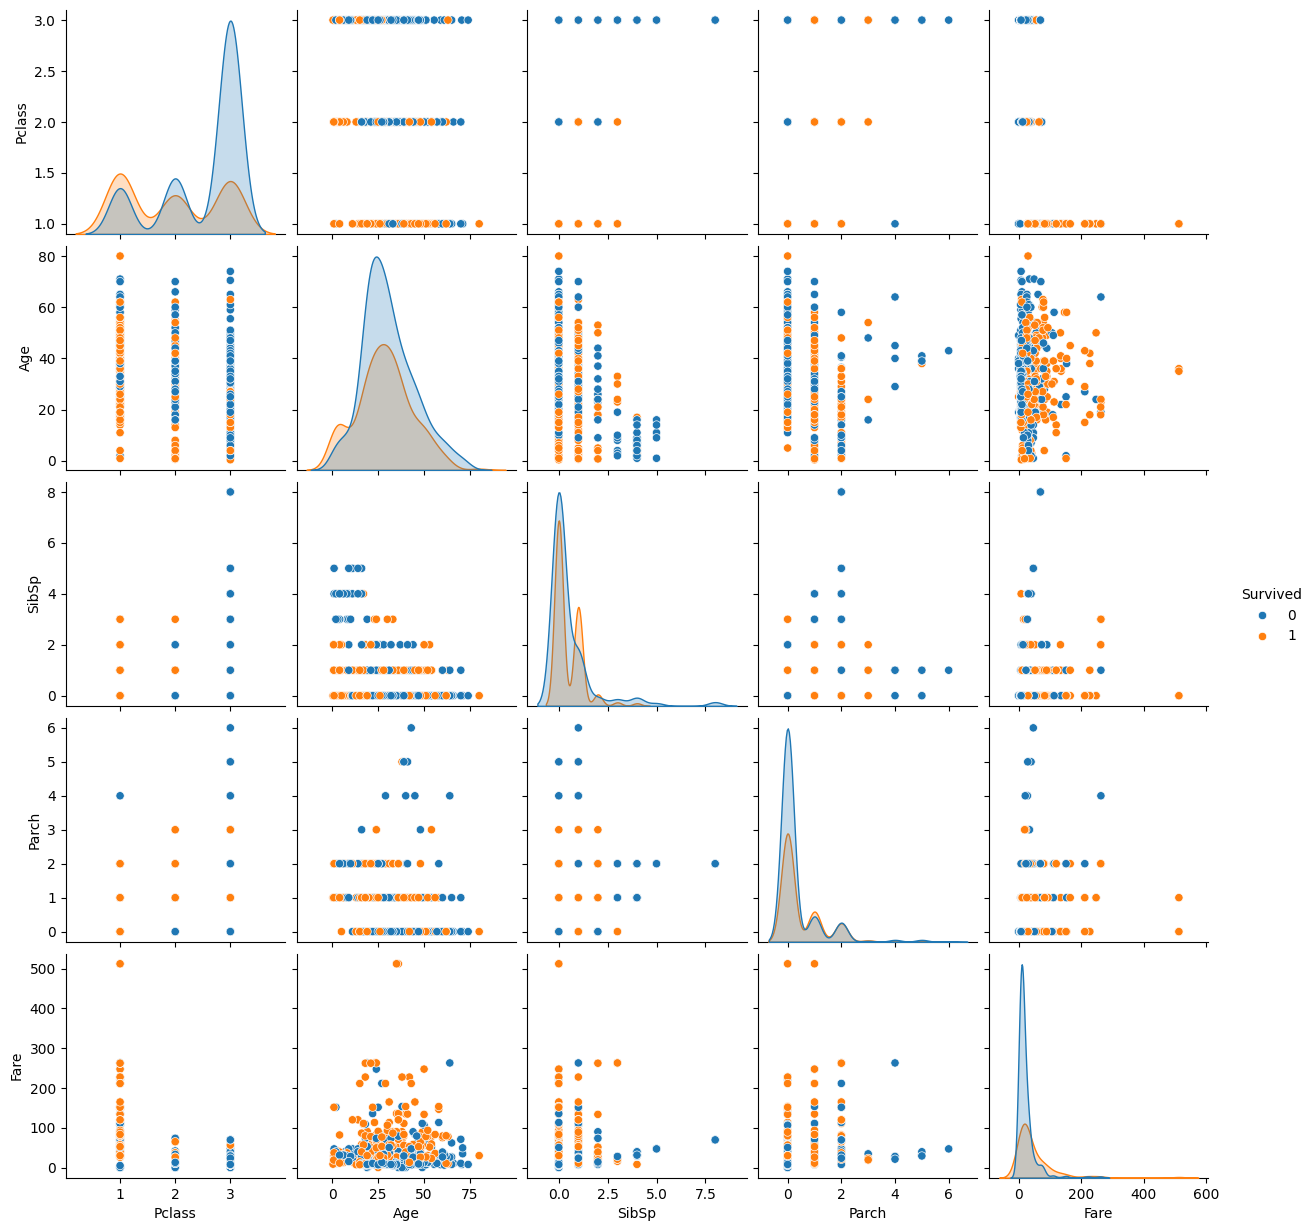

In [154]:
sns.pairplot(hue="Survived", data=train_data)

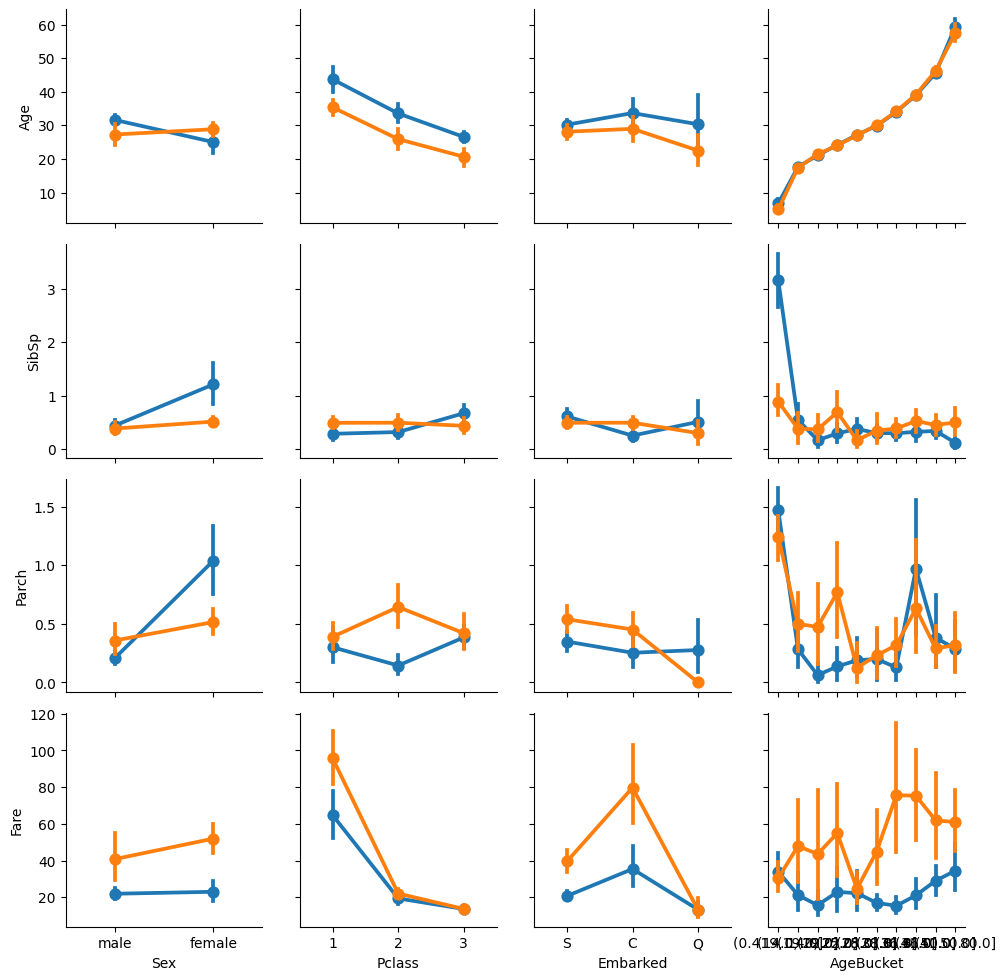

In [156]:
g = sns.PairGrid(train_data, x_vars=cat_columns+["AgeBucket"], y_vars=num_columns, hue="Survived")
g.map(sns.pointplot)

C:\Users\asusr\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\asusr\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


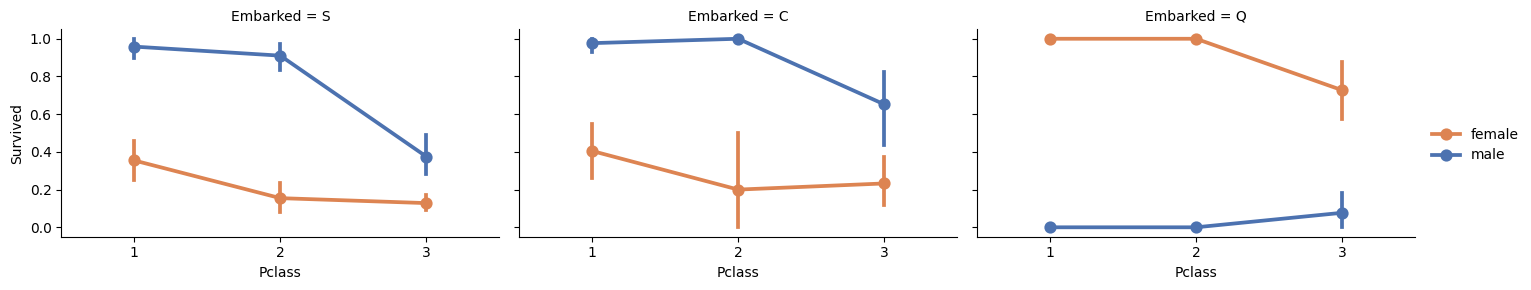

In [167]:
grid = sns.FacetGrid(train_data, col='Embarked', aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

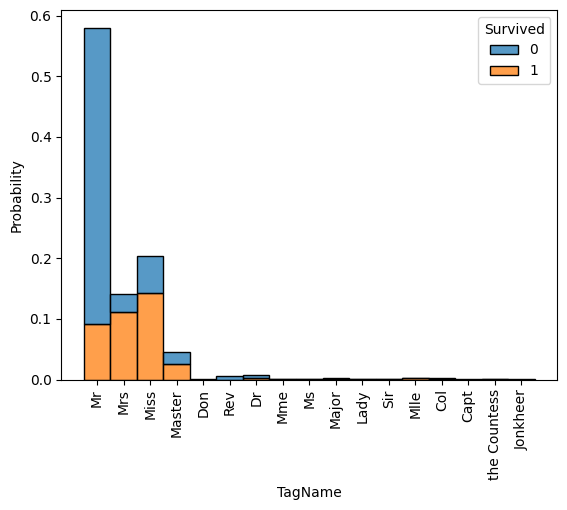

In [168]:
df_plt = train_data.copy(deep=True)

df_plt["TagName"] = df_plt["Name"].apply(lambda x :  x[x.find(',')+2: x.find('.')])

sns.histplot(data=df_plt, x="TagName", hue="Survived", stat="probability", multiple='stack')
plt.xticks(rotation=90)  
plt.show()

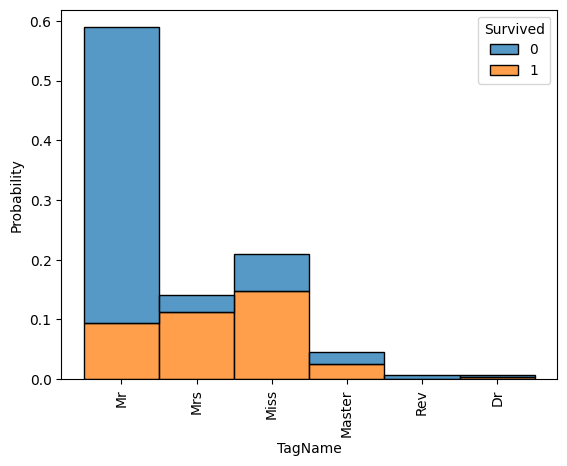

In [169]:
unique_tag_names   = ["Don", "Mme",  "Ms",   "Major", "Lady", "Sir", "Mlle", "Col", "Capt", "the Countess", "Jonkheer"]
replaces_tag_names = ["Mr",  "Miss", "Miss", "Mr",    "Miss", "Mr",  "Miss", "Mr",  "Mr",   "Mrs",          "Mr"]
#df_plt[df_plt["TagName"].isin(unique_tag_names)]
df_plt["TagName"] = df_plt["TagName"].replace(dict(zip(unique_tag_names, replaces_tag_names)))

sns.histplot(data=df_plt, x="TagName", hue="Survived", stat="probability", multiple='stack')
plt.xticks(rotation=90)  
plt.show()

In [170]:
train_data["TagName"] = train_data["Name"].apply(lambda x :  x[x.find(',')+2: x.find('.')])
train_data["TagName"] = train_data["TagName"].replace(dict(zip(unique_tag_names, replaces_tag_names)))

In [171]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Survived   891 non-null    int64   
 1   Pclass     891 non-null    int64   
 2   Name       891 non-null    object  
 3   Sex        891 non-null    object  
 4   Age        714 non-null    float64 
 5   SibSp      891 non-null    int64   
 6   Parch      891 non-null    int64   
 7   Ticket     891 non-null    object  
 8   Fare       891 non-null    float64 
 9   Cabin      204 non-null    object  
 10  Embarked   889 non-null    object  
 11  AgeBucket  714 non-null    category
 12  TagName    891 non-null    object  
dtypes: category(1), float64(2), int64(4), object(6)
memory usage: 92.1+ KB


In [172]:
bucket_columns = ["AgeBucket"]
cat_bucket_columns = cat_columns + bucket_columns

In [173]:
train_data.groupby(["Pclass"])[cat_bucket_columns].agg(pd.Series.mode)

,Sex,Pclass,Embarked,AgeBucket
Pclass,,,,
1,male,1,S,"(50.0, 80.0]"
2,male,2,S,"(31.8, 36.0]"
3,male,3,S,"(14.0, 19.0]"


In [186]:
train_data.groupby(["TagName"])[cat_bucket_columns].agg(pd.Series.mode)

,Sex,Pclass,Embarked,AgeBucket
TagName,,,,
Dr,male,1,S,"(41.0, 50.0]"
Master,male,3,S,"(0.419, 14.0]"
Miss,female,3,S,"(0.419, 14.0]"
Mr,male,3,S,"(31.8, 36.0]"
Mrs,female,1,S,"(41.0, 50.0]"
Rev,male,2,S,"(50.0, 80.0]"


In [178]:
train_data[cat_bucket_columns].agg(pd.Series.mode)

,Sex,Pclass,Embarked,AgeBucket
0,male,3,S,"(31.8, 36.0]"


In [191]:
train_data.groupby(["TagName"])[["Age", "Fare"]].agg(pd.Series.median)

,Age,Fare
TagName,,
Dr,46.5,30.5000
Master,3.5,29.0625
Miss,22.0,16.7000
Mr,30.0,9.5000
Mrs,35.0,26.0000
Rev,46.5,13.0000


In [192]:
train_data.groupby(["TagName"])[["Age", "Fare"]].agg(pd.Series.mean)

,Age,Fare
TagName,,
Dr,42.000000,49.168457
Master,4.574167,34.703125
Miss,22.033113,43.913995
Mr,32.740148,24.592450
Mrs,35.871560,45.466798
Rev,43.166667,18.312500


__Master with 3.5???__

In [193]:
train_data.groupby(["TagName"])[["Age", "Fare"]].count()

,Age,Fare
TagName,,
Dr,6,7
Master,36,40
Miss,151,187
Mr,406,525
Mrs,109,126
Rev,6,6


In [179]:
train_data.groupby(["Pclass"])[["Age", "Fare"]].median()

,Age,Fare
Pclass,,
1,37.0,60.2875
2,29.0,14.2500
3,24.0,8.0500


<Axes: xlabel='Age'>

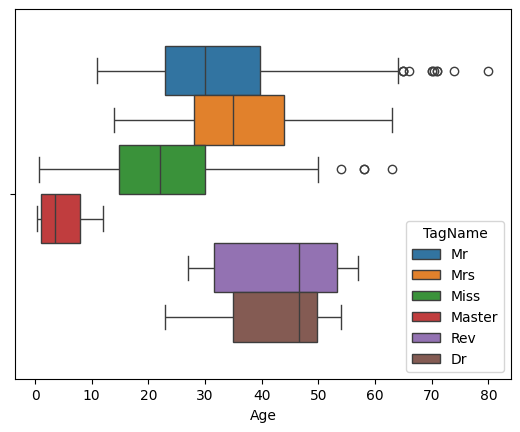

In [196]:
sns.boxplot(data=train_data, x="Age", hue="TagName")

<Axes: xlabel='Fare'>

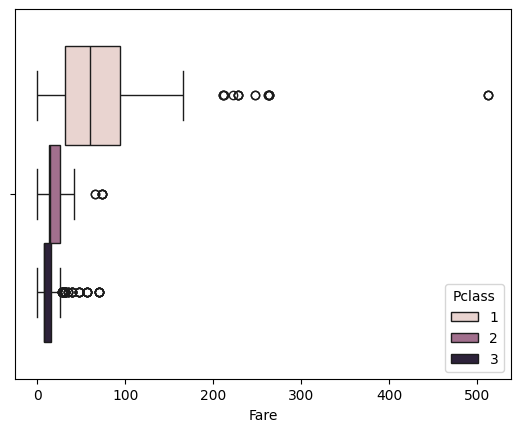

In [198]:
sns.boxplot(data=train_data, x="Fare", hue="Pclass")

In [328]:
# just playing
# # P(Survive | Female) = P(S ^ F) ^ P(S) / P(F)
# prob_survive_and_female = ((train_data["Sex"] == "female") & (train_data["Survived"] == 1)).mean()
# prob_survive_and_male = ((train_data["Sex"] == "male") & (train_data["Survived"] == 1)).mean()
# prob_survive = ((train_data["Survived"] == 1)).mean()
# prob_female = ((train_data["Sex"] == "female")).mean()
# prob_male = 1 - prob_female
# prob_unsuvived = 1 - prob_survive

# print("# P(Survive | female) = P(S ^ F) ^ P(S) / P(F) = ", prob_survive_and_female * prob_survive / prob_female)
# print("# P(Survive | male) = P(S ^ M) ^ P(S) / P(M) = ", prob_survive_and_male * prob_survive / prob_male)

# Prepare The Data

- fill __Embarked__ with "S"
- fill __Age__, __AgeBucket__ using TagName
- fill __Fare__ using Pclass
- Drop __Cabin__

In [310]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [397]:
# series_groupby = train_data[["TagName", "AgeBucket", "Embarked"]].groupby("TagName").agg(pd.Series.mode)
def fill_na_(X, series_groupby):
    X = X.copy(deep=True)
    index_colname = series_groupby.index.name
    
    for index_value in series_groupby.index:
        for column_name in series_groupby.columns:
            msk = X[index_colname] == index_value
            fill_val = series_groupby.loc[index_value, column_name]
            X.loc[msk, column_name] = X.loc[msk, column_name].fillna(fill_val)
    return X

In [409]:
X_ = add_age_bucket(train_data)
X_ = add_tag_name(X_)
X_[["TagName", "AgeBucket"]].groupby("TagName").agg(pd.Series.mode)

,AgeBucket
TagName,
Dr,"(41.0, 50.0]"
Master,"(0.419, 14.0]"
Miss,"(0.419, 14.0]"
Mr,"(31.8, 36.0]"
Mrs,"(41.0, 50.0]"
Rev,"(50.0, 80.0]"


In [410]:
fill_na_(X_, X_[["TagName", "AgeBucket"]].groupby("TagName").agg(pd.Series.mode))

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBucket,TagName
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(19.0, 22.0]",Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(36.0, 41.0]",Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(25.0, 28.0]",Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(31.8, 36.0]",Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(31.8, 36.0]",Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"(25.0, 28.0]",Rev
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"(14.0, 19.0]",Miss
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,"(0.419, 14.0]",Miss


In [398]:
class TitanicImputer(BaseEstimator, TransformerMixin):
    def __init__(self, add_age_bucket = False):
        self.add_age_bucket = add_age_bucket
        
    def fit(self, X, y=None):
        # print(X)
        self.fare_fill = X[["Pclass", "Fare"]].groupby("Fare").median()
        if self.add_age_bucket:
            self.age_bucket_fill = X[["TagName", "AgeBucket"]].groupby("TagName").agg(pd.Series.mode)
        else:
            self.age_fill = X[["TagName", "Age"]].groupby("TagName").median()
        
        return self

    def transform(self, X):
        X = X.copy(deep=True)
        X["Embarked"] = X["Embarked"].fillna("S")
        X = fill_na_(X, self.fare_fill)
        
        if self.add_age_bucket:
            X = fill_na_(X, self.age_bucket_fill)
        else:
            X = fill_na_(X, self.age_fill)
            
        return X

def add_tag_name(X, y=None):
    X = X.copy(deep=True)
    unique_tag_names   = ["Don", "Mme",  "Ms",   "Major", "Lady", "Sir", "Mlle", "Col", "Capt", "the Countess", "Jonkheer"]
    replaces_tag_names = ["Mr",  "Miss", "Miss", "Mr",    "Miss", "Mr",  "Miss", "Mr",  "Mr",   "Mrs",          "Mr"]
    X["TagName"] = X["Name"].apply(lambda x :  x[x.find(',')+2: x.find('.')])
    X["TagName"] = X["TagName"].replace(dict(zip(unique_tag_names, replaces_tag_names)))
    return X


def add_age_bucket(X, y=None):
    X = X.copy(deep=True)
    X["AgeBucket"] = pd.qcut(train_data["Age"], 10, )
    return X

def add_relatives_count(X, y=None):
    X = X.copy(deep=True)
    X["RelativesCount"] = X["SibSp"] + X["Parch"]
    return X


In [399]:
cat_columns = ['Pclass', 'TagName', 'Sex', 'Embarked'] #, 'AgeBucket']
num_columns = ['SibSp', 'Parch', 'RelativesCount'] #, 'Age']

# Add AgeBucket => for numerical clf
pipeline_base = Pipeline([
    ('add_tag_name', FunctionTransformer(add_tag_name)),
    ('add_age_bucket', FunctionTransformer(add_age_bucket)),
    ('add_relatives_count', FunctionTransformer(add_relatives_count)),
    ('custom_bucket_imputer', TitanicImputer(add_age_bucket=True)),
    ('col_tranform', 
        ColumnTransformer([
            ('num_pipeline', StandardScaler(), num_columns),
            ('cat_bucket_pipeline', OneHotEncoder(), cat_columns + ['AgeBucket']),
        ])
    )
    
])

# No AgeBucket => for tree classifiers
pipeline_tree_base = Pipeline([
    ('add_tag_name', FunctionTransformer(add_tag_name)),
    ('add_relatives_count', FunctionTransformer(add_relatives_count)),
    ('custom_bucket_imputer', TitanicImputer(add_age_bucket=False)),
    ('col_tranform', 
         ColumnTransformer([
            ('num_pipeline', StandardScaler(), num_columns + ['Age']),
            ('cat_pipeline', OneHotEncoder(), cat_columns),
        ])
    )
])

In [400]:
train_data, test_data = fetch_titanic_dataset()

train_data = train_data.set_index("PassengerId")
test_data = test_data.set_index("PassengerId")

In [401]:
pipeline_tree_base.fit_transform(train_data).shape

(891, 18)

- "TagName" => 6
- "Sex" => 2
- "Embarked" => 3
- "Pclass" => 3
- "SibSp" => 1
- "Parch" => 1
- "RelativesCount" => 1
- "Age" => 1

- "TagName" => 6
- "Sex" => 2
- "Embarked" => 3
- "Pclass" => 3
- "SibSp" => 1
- "Parch" => 1

- "AgeBucket" => 10

In [403]:
from sklearn.model_selection import train_test_split

In [404]:
X, y = train_data.drop(['Survived'], axis=1), train_data["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

print(y_train.shape, y_test.shape)

(801,) (90,)


In [418]:
# X_train_tree = pipeline_tree_base.fit_transform(X_train)
# X_test_tree = pipeline_tree_base.transform(X_test)

# X_train_base = pipeline_base.fit_transform(X_train)
# X_test_base  = pipeline_base.transform(X_test)

# print(X_train_tree.shape, X_test_tree.shape)
# print(X_train_base.shape, X_test_base.shape)
# X_ = X_train
X_ = pipeline_base[0].fit_transform(X_train)
X_ = pipeline_base[1].fit_transform(X_)
X_ = pipeline_base[2].fit_transform(X_)
pipeline_base[3].fit(X_)
pipeline_base[3].age_bucket_fill

,AgeBucket
TagName,
Dr,"(41.0, 50.0]"
Master,"(0.419, 14.0]"
Miss,"(0.419, 14.0]"
Mr,"(31.8, 36.0]"
Mrs,"(31.8, 36.0]"
Rev,"[(25.0, 28.0], (50.0, 80.0]] Categories (10, i..."


In [457]:
s = X_[["TagName", "AgeBucket"]].groupby("TagName").agg(lambda x : x.value_counts().idxmax())

In [458]:
s

,AgeBucket
TagName,
Dr,"(41.0, 50.0]"
Master,"(0.419, 14.0]"
Miss,"(0.419, 14.0]"
Mr,"(31.8, 36.0]"
Mrs,"(31.8, 36.0]"
Rev,"(25.0, 28.0]"


# Shortlist Promising Models

In [358]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [362]:
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score, GridSearchCV

In [363]:
tree_models = [RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), XGBClassifier()]
tree_models_names = ["clf_forest", "clf_adaboost", "clf_gb", "clf_xgb"]

models = [LogisticRegression(), SVC(), GaussianNB(), KNeighborsClassifier(), MLPClassifier()]
models_names = ["clf_logistic", "clf_svc", "clf_bayes", "clf_knn", "clf_nn"]

In [ ]:
cv_results = []

for model in tree_models:
    

In [ ]:
cross_val_score(tree_models)